<a href="https://colab.research.google.com/github/ch-hee/Enefit-ML-project/blob/main/Enefit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install polars==0.19.19

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.17.3
    Uninstalling polars-0.17.3:
      Successfully uninstalled polars-0.17.3


In [ ]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
base_path = '/content/drive/MyDrive/Data/enefit'

df_train = pd.read_csv(os.path.join(base_path, 'train.csv'))
df_client = pd.read_csv(os.path.join(base_path, 'client.csv'))
df_gas = pd.read_csv(os.path.join(base_path, 'gas_prices.csv'))
df_electricity = pd.read_csv(os.path.join(base_path, 'electricity_prices.csv'))
df_forecast = pd.read_csv(os.path.join(base_path, 'forecast_weather.csv'))
df_historical = pd.read_csv(os.path.join(base_path, 'historical_weather.csv'))
df_location = pd.read_csv(os.path.join(base_path, 'weather_station_to_county_mapping.csv'))

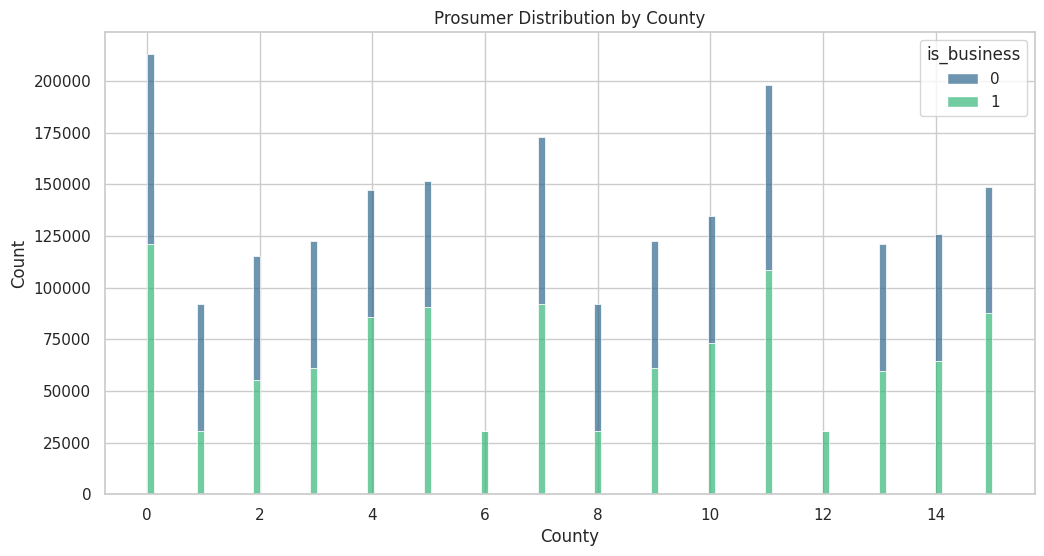

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='county', hue='is_business', multiple='stack', palette='viridis', alpha=0.7)

plt.xlabel('County')
plt.ylabel('Count')
plt.title('Prosumer Distribution by County')

plt.show()

In [ ]:
gas_prices_over_time = px.area(df_gas, x='forecast_date', y=['lowest_price_per_mwh', 'highest_price_per_mwh'],
                               title='Gas Prices Over Time',
                               labels={'forecast_date': 'Forecast Date', 'value': 'Price (Euro/MWh)'})
gas_prices_over_time.update_layout(legend_title_text='Price Type')

In [ ]:
electricity_prices_over_time = px.line(df_electricity, x='forecast_date', y='euros_per_mwh',
                               title='Electricity Prices Over Time',
                               labels={'forecast_date': 'Forecast Date', 'value': 'Price (Euro/MWh)'})
electricity_prices_over_time.update_layout()

In [ ]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['date'] = df_train['datetime'].dt.normalize()
df_train['month'] = df_train['date'].dt.strftime("%Y-%m")

In [ ]:
time_target = df_train.groupby(['datetime', 'is_consumption'])['target'].mean().reset_index()
day_target = df_train.groupby(['date', 'is_consumption'])['target'].mean().reset_index()
month_target = df_train.groupby(['month', 'is_consumption'])['target'].mean().reset_index()

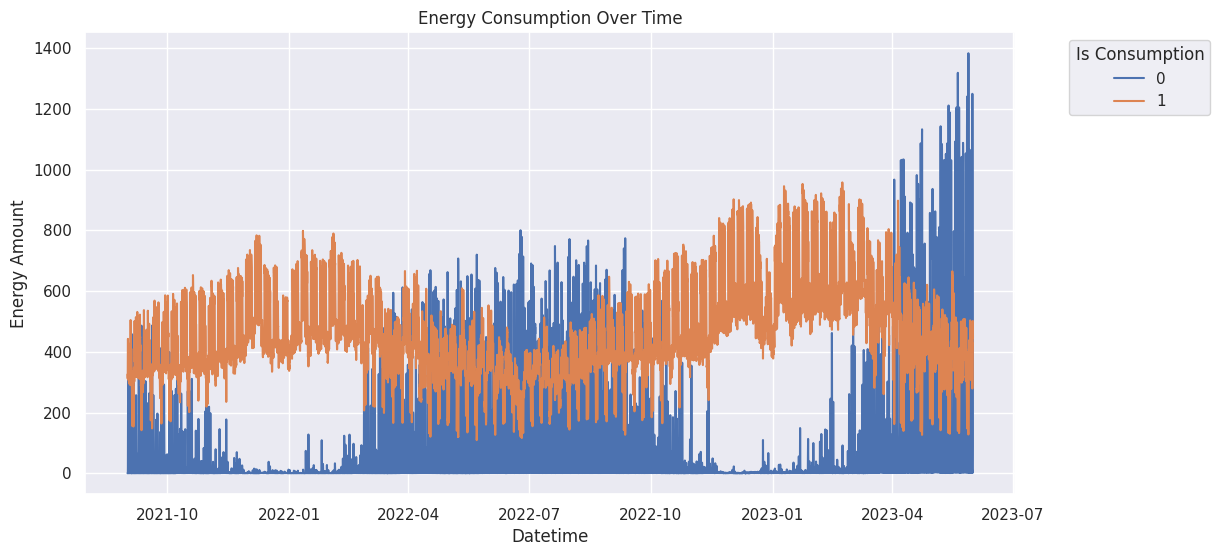

In [ ]:
sns.set_theme()

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_target, x='datetime', y='target', hue='is_consumption', markers=True)

plt.xlabel('Datetime')
plt.ylabel('Energy Amount')
plt.title('Energy Consumption Over Time')

plt.legend(title='Is Consumption', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

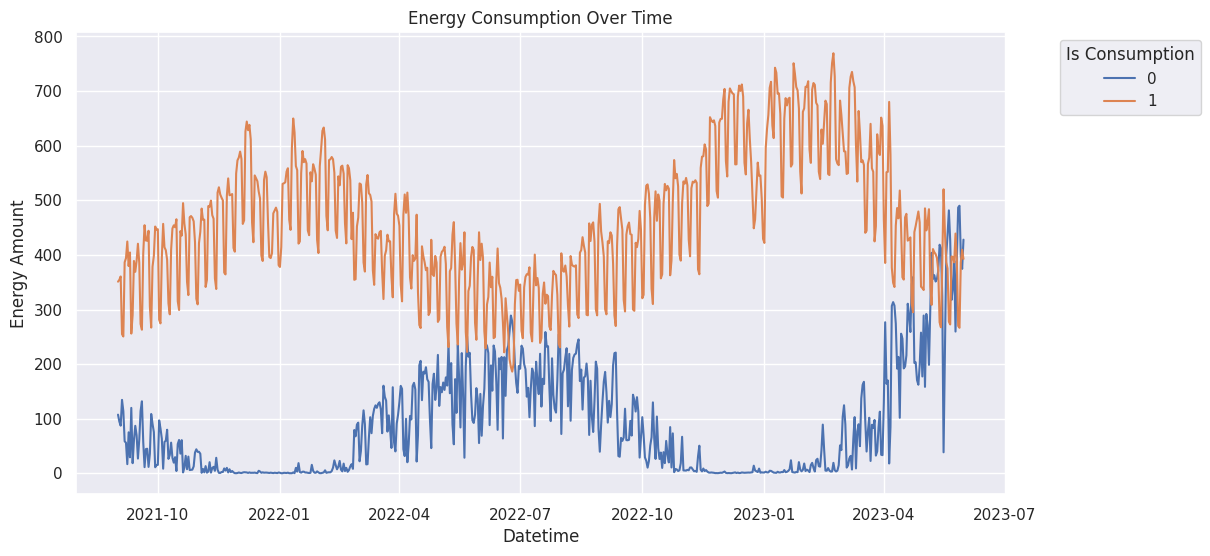

In [ ]:
sns.set_theme()

plt.figure(figsize=(12, 6))
sns.lineplot(data=day_target, x='date', y='target', hue='is_consumption', markers=True)

plt.xlabel('Datetime')
plt.ylabel('Energy Amount')
plt.title('Energy Consumption Over Time')

plt.legend(title='Is Consumption', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

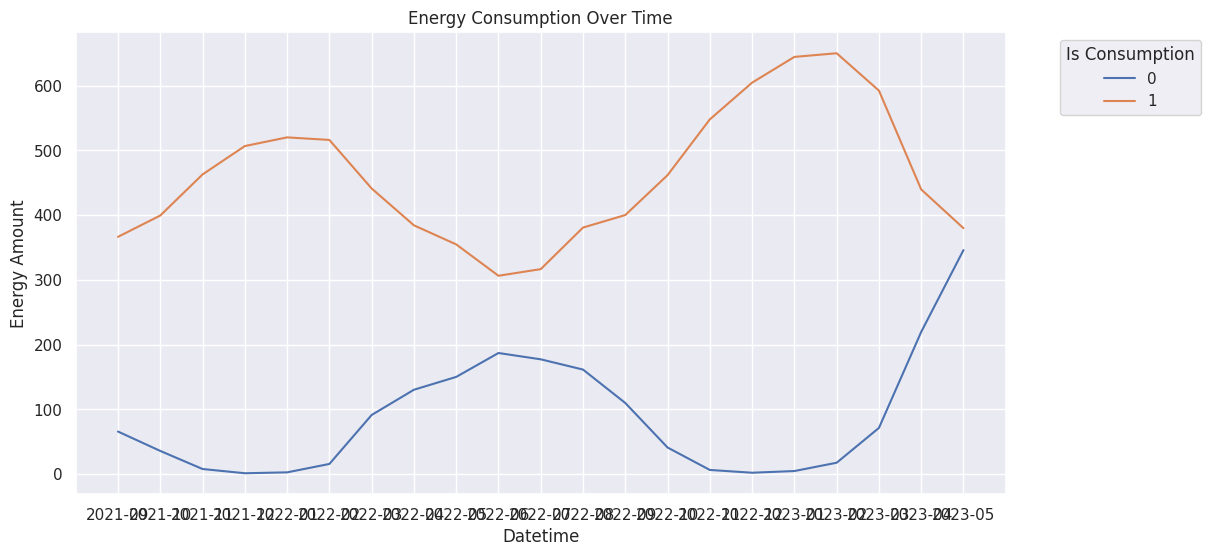

In [ ]:
sns.set_theme()

plt.figure(figsize=(12, 6))
sns.lineplot(data=month_target, x='month', y='target', hue='is_consumption', markers=True)

plt.xlabel('Datetime')
plt.ylabel('Energy Amount')
plt.title('Energy Consumption Over Time')

plt.legend(title='Is Consumption', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df_historical['datetime'] = pd.to_datetime(df_historical['datetime'])
df_historical['date'] = df_historical['datetime'].dt.normalize()
df_historical['month'] = df_historical['date'].dt.strftime("%Y-%m")

In [ ]:
def plot_weather_feature(df, col):
    random_color = sns.color_palette("husl", 1)[0]

    df = df_historical.groupby('date')[col].mean().reset_index()

    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y=col, data=df, label=col, color=random_color)
    # plt.axhline(y=0, color='black', linestyle='--', linewidth=2,)

    plt.title(f'{col} Over Time')
    plt.xlabel('Date and Time')

    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

    # x 축 레이블이 겹치지 않도록 조정
    plt.gcf().autofmt_xdate()

    # 범례 추가
    plt.legend(loc='upper right')

    # 그래프 표시
    plt.show()

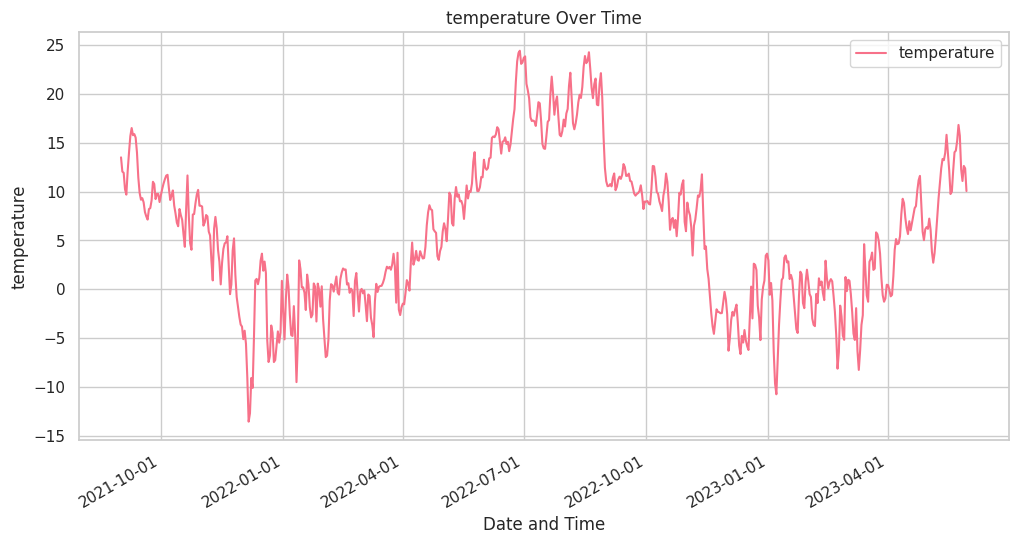

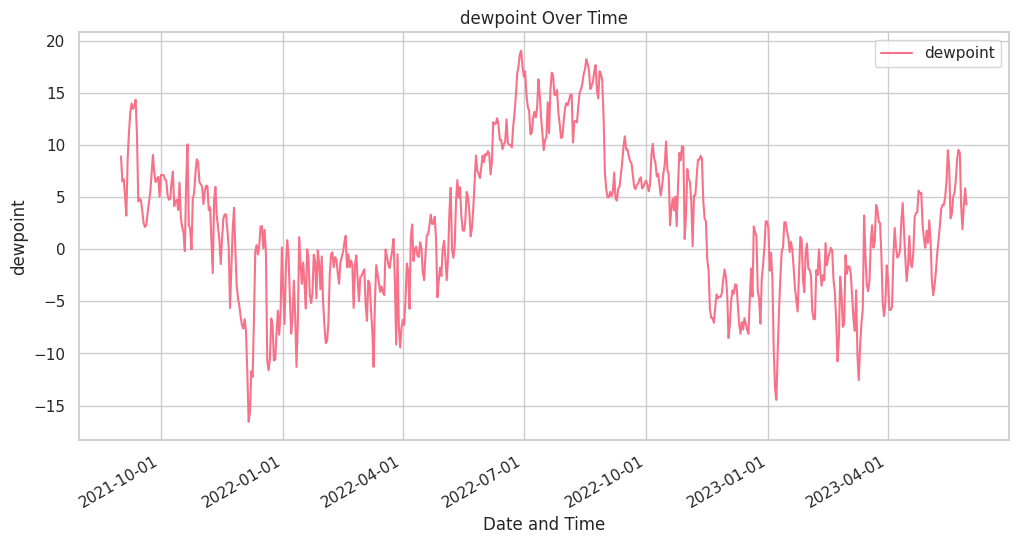

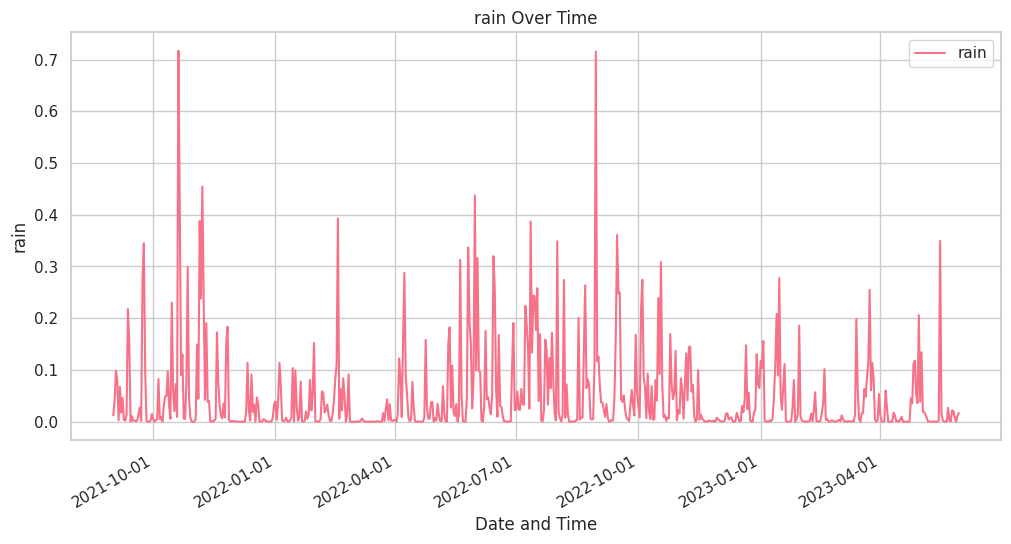

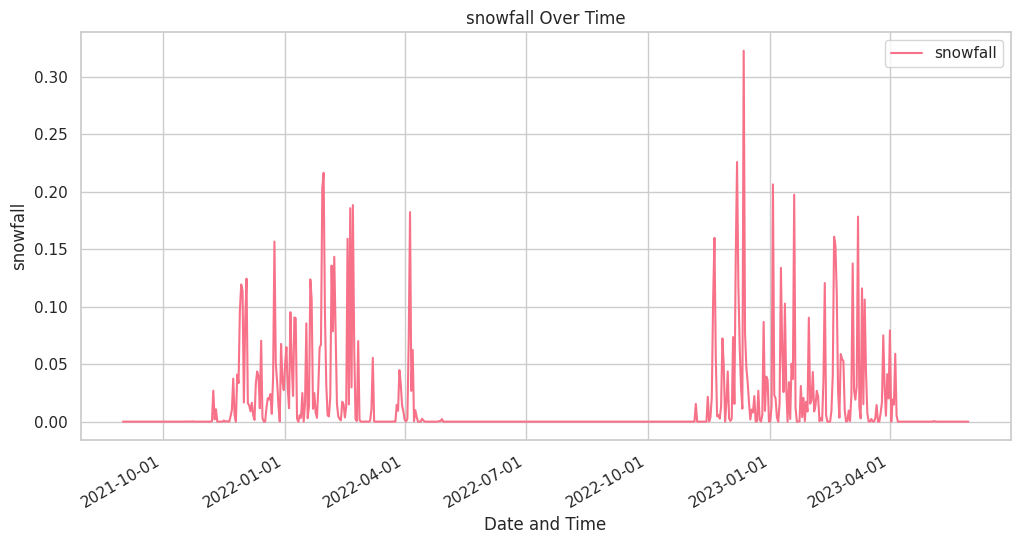

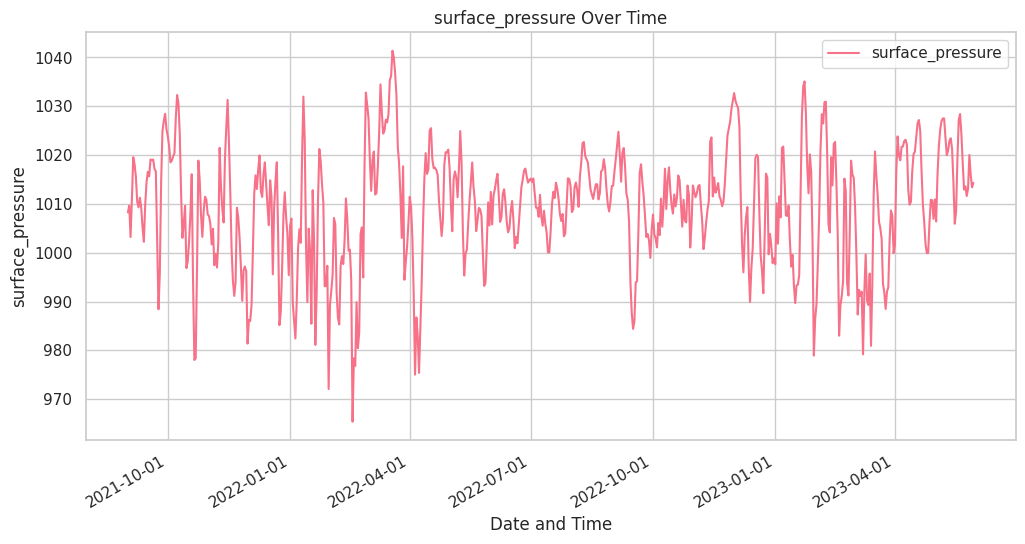

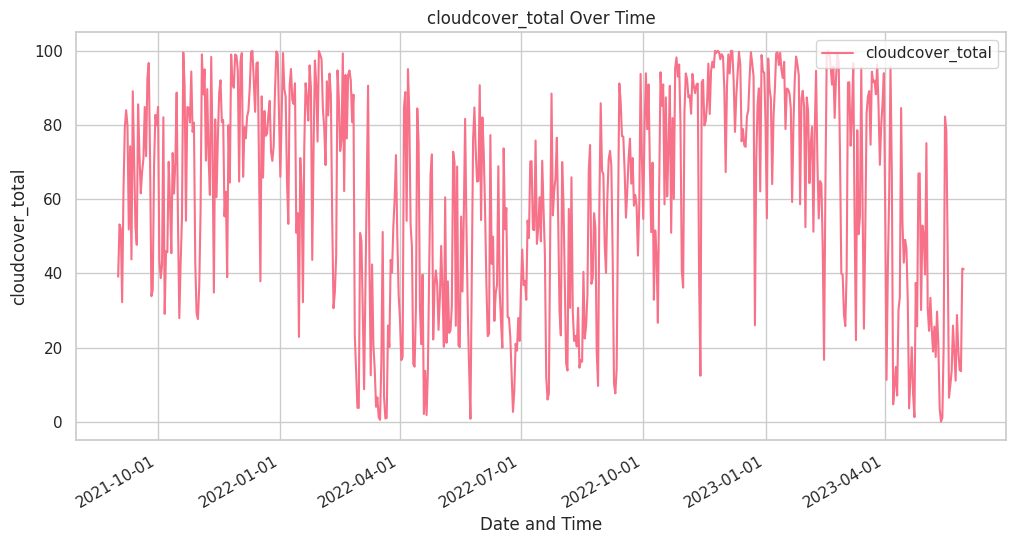

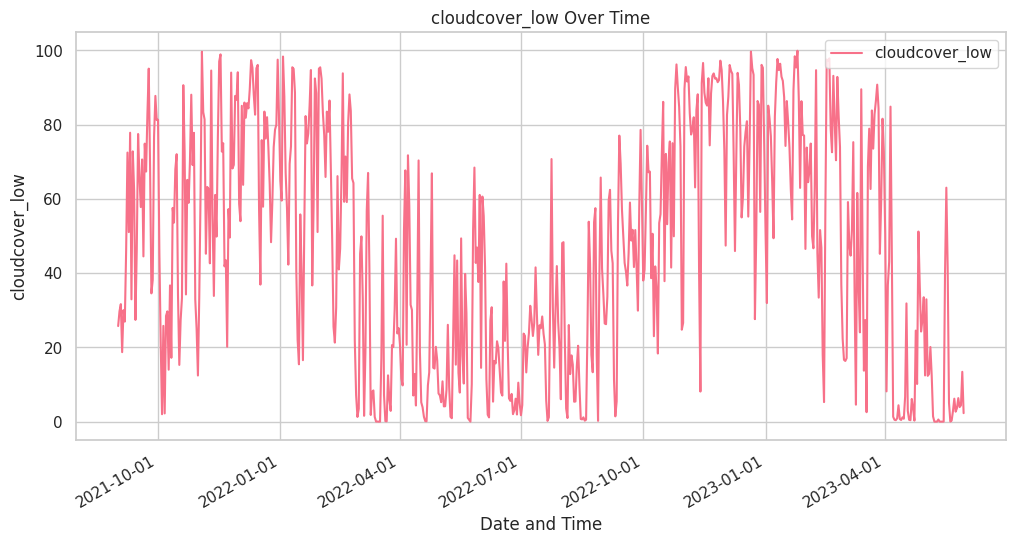

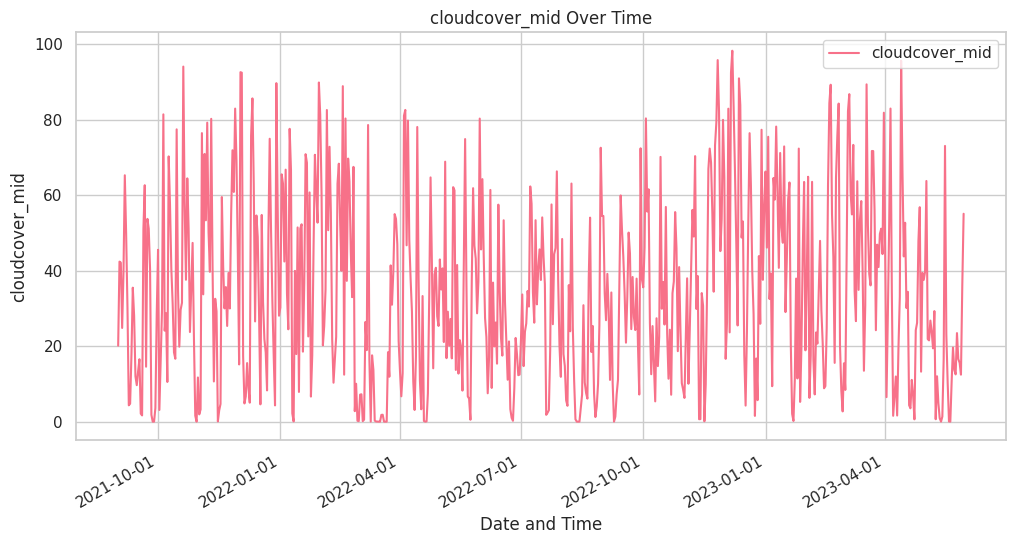

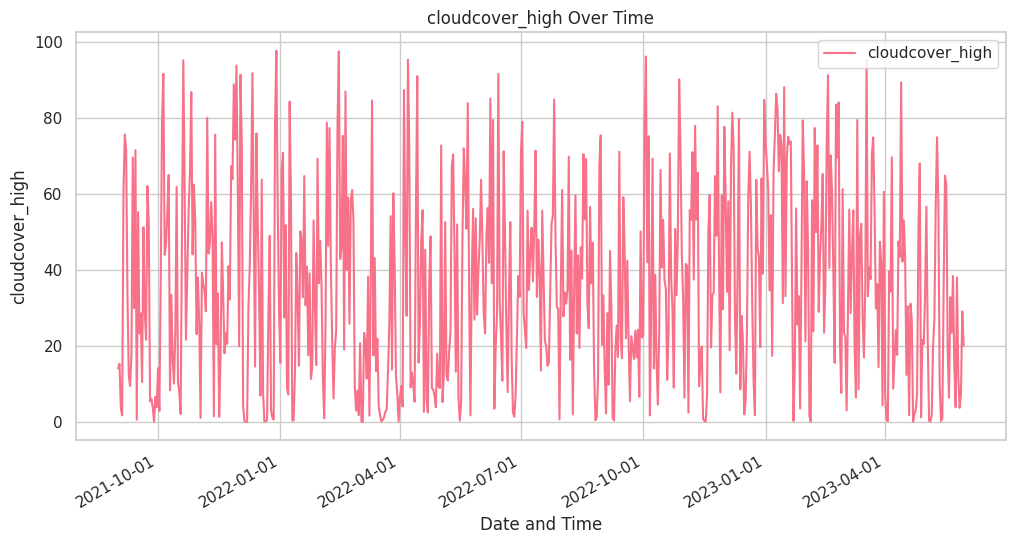

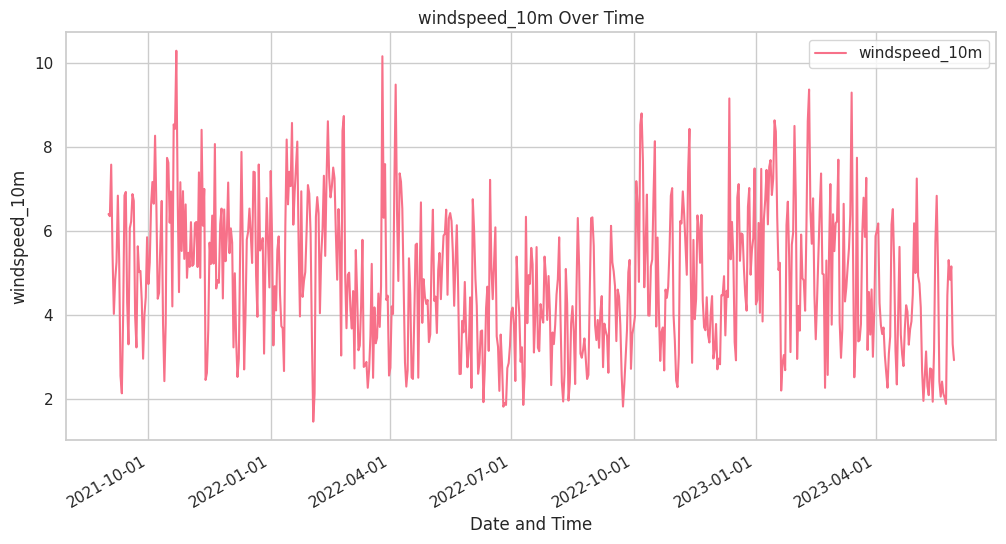

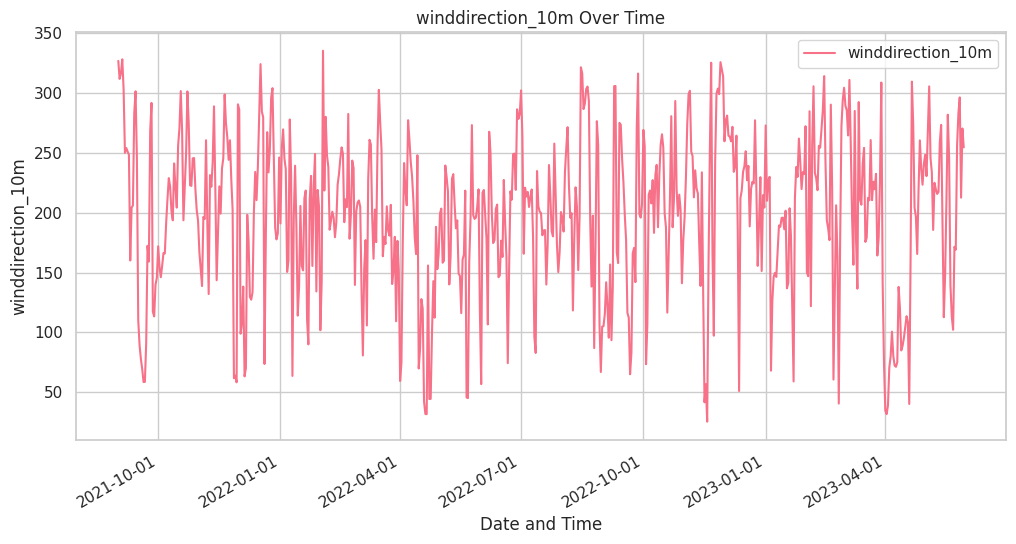

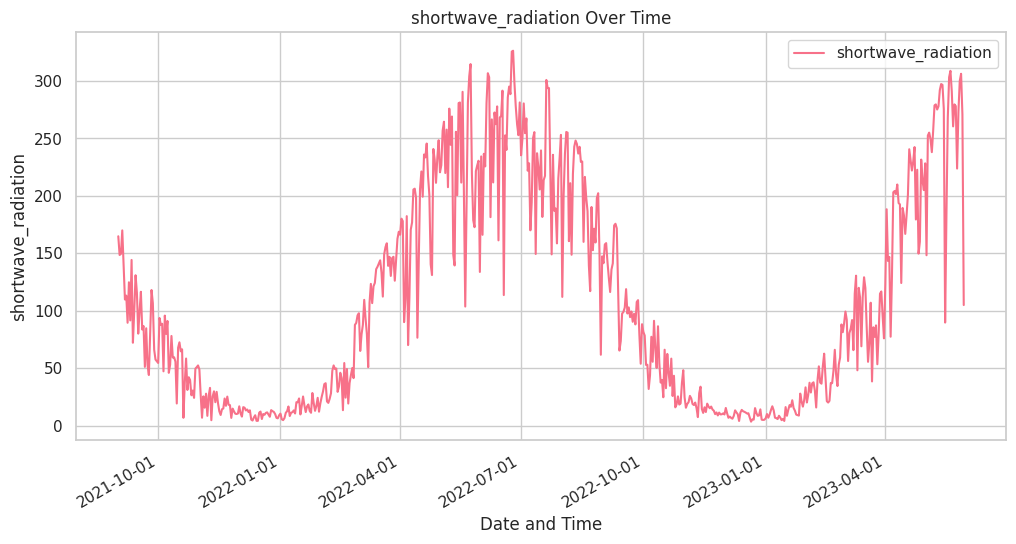

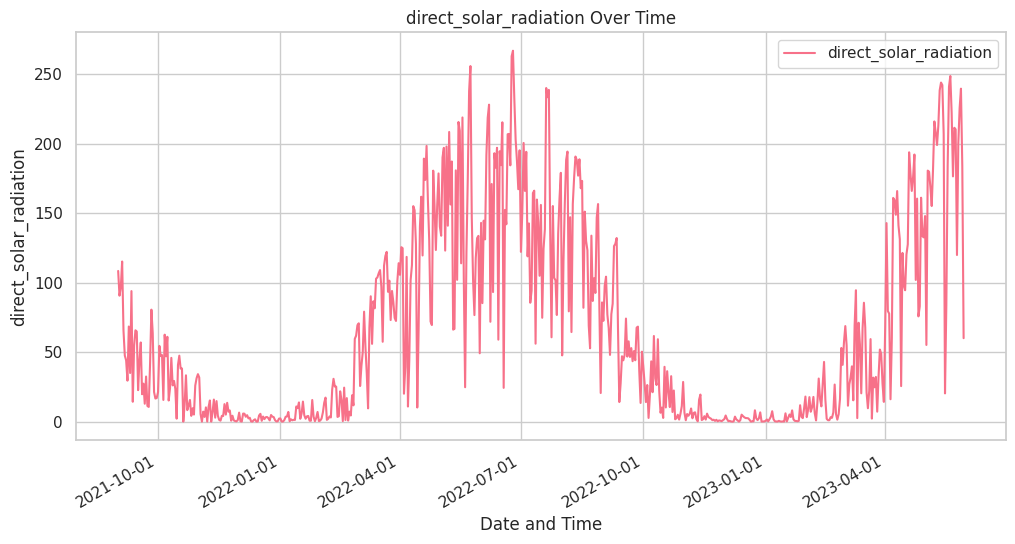

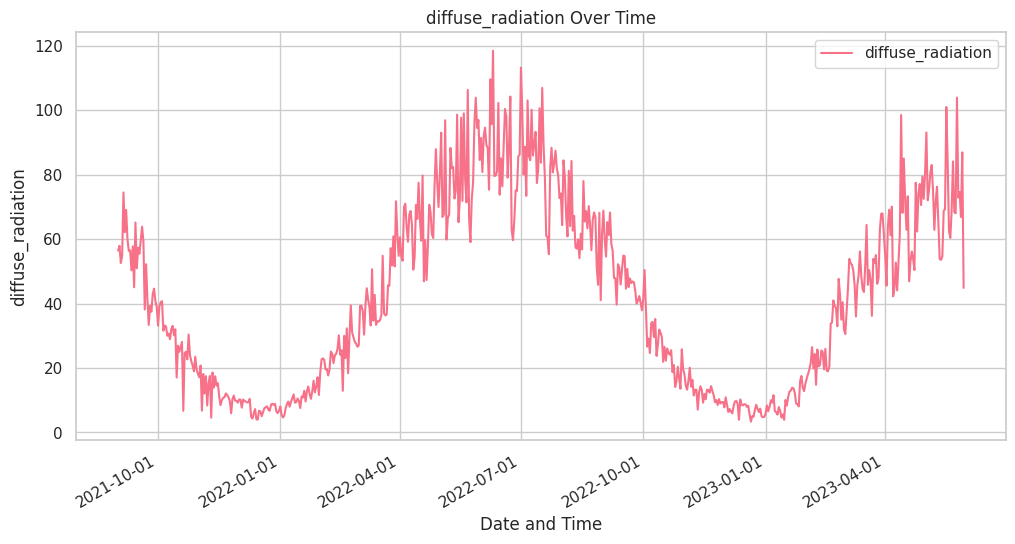

In [ ]:
for col in df_historical.columns[1:-5]:
    plot_weather_feature(df_historical, col)

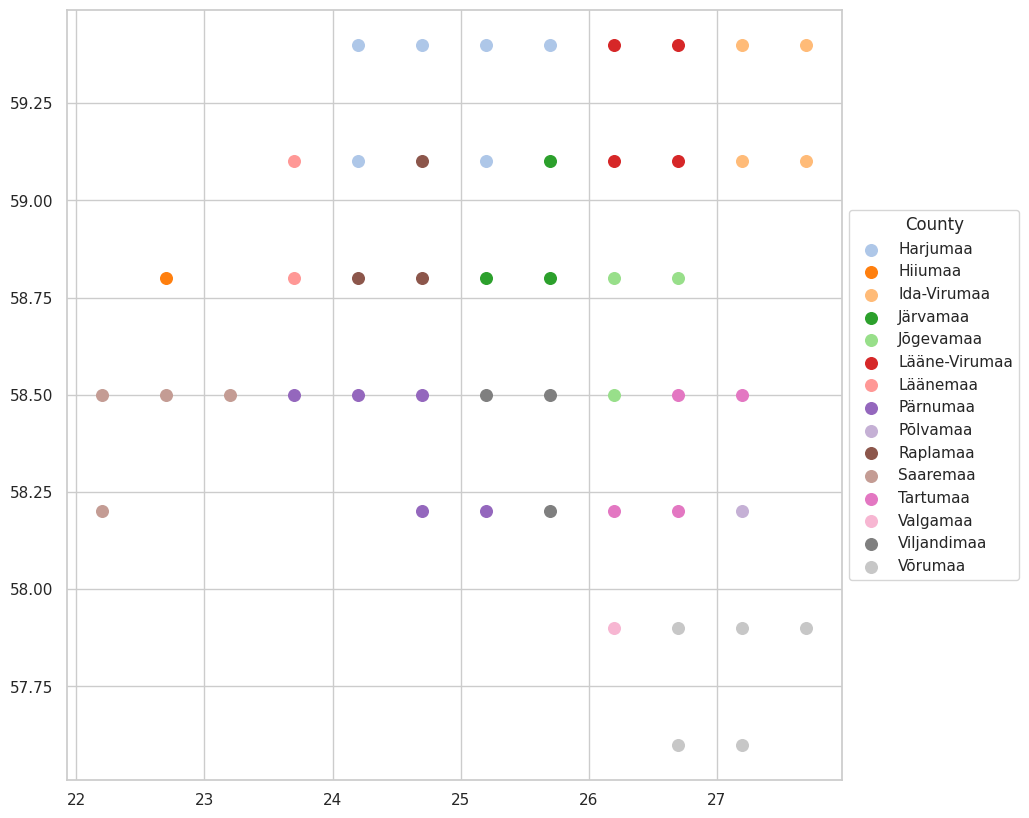

In [ ]:
colors = plt.cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10, 10))
i = 0
for county, group in df_location.groupby('county_name'):
    i += 1
    ax.scatter(group['longitude'], group['latitude'], label=county, color=colors(i), s=70)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='County')
plt.show()